In [120]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('ggplot');

Left side of the data here is the calculated prob. from our model (we'll call this expected return vs. implied), the right side of the equation is the odds given by the book. Each of these bets is +EV, that is, the expected return is greater than implied. 

In [2]:
expected_returns = [0.5, 0.4, 0.3]
odds = [200, 300, 400]

df = pd.DataFrame({
    'expected_returns': expected_returns,
    'odds': odds
})

df.head()

,expected_returns,odds
0,0.5,200
1,0.4,300
2,0.3,400


To prove that, let's convert each of these odds values to implied probabilities, and calculate our profit margin for each bet:

In [3]:
df['implied_returns'] = 100 / (df['odds'] + 100)
df['profit_margin'] = df['expected_returns'] - df['implied_returns']
df.head()

,expected_returns,odds,implied_returns,profit_margin
0,0.5,200,0.333333,0.166667
1,0.4,300,0.250000,0.150000
2,0.3,400,0.200000,0.100000


Where losing the bet means losing the entire wager:
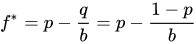

In [4]:
df['optimal_f'] = df['expected_returns'] - (1 - df['expected_returns'])/(df['odds']/100)
df.head()

,expected_returns,odds,implied_returns,profit_margin,optimal_f
0,0.5,200,0.333333,0.166667,0.250
1,0.4,300,0.250000,0.150000,0.200
2,0.3,400,0.200000,0.100000,0.125


In [79]:
np.random.binomial(n=1, p=0.5)

1

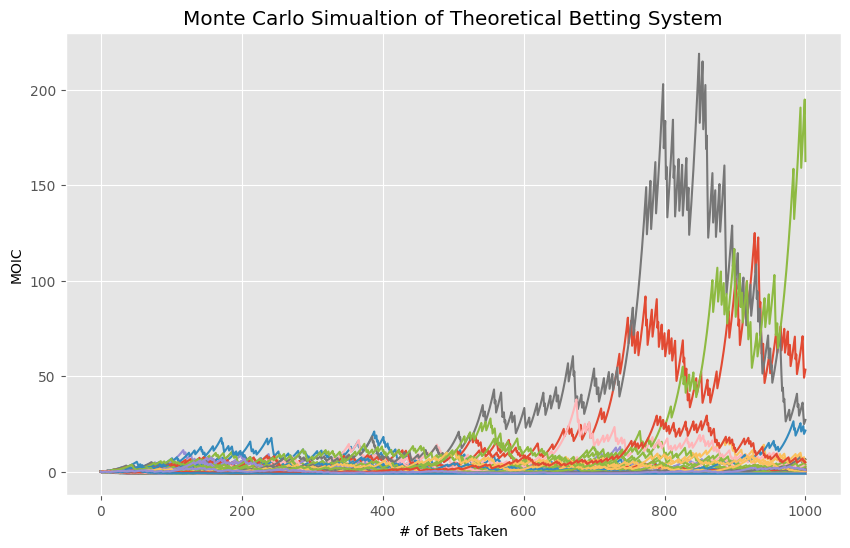

In [264]:
n_simulations = 150
n_bets = 1000
starting_capital = 1000
odds = 1.25/1 #-400 or 80% implied probability
expected_return = 0.81

optimal_f = expected_return - (1-expected_return)/(odds)
chosen_f = optimal_f/4

simulations = []

for n in range(n_simulations):
    capital = starting_capital
    capital_over_time = [starting_capital]
    for n in range(n_bets):
        expected_return = np.random.uniform(low=0.80, high=0.81, size=1)
        if capital <= starting_capital*0.1:
            capital_over_time.append(0)
        else:
            result = np.random.binomial(n=1, p=expected_return)
            bet_size = capital*chosen_f
            if result:
                capital = capital + bet_size*(odds - 1)

                capital_over_time.append(capital)
            else:
                capital = capital - bet_size
                capital_over_time.append(capital)
                
    simulations.append([x/1000 - 1 for x in capital_over_time]) #getting returns on capital
    
fig, ax = plt.subplots(figsize=(10,6))
for sim in simulations:
    ax.plot(sim);
    
ax.set_title('Monte Carlo Simualtion of Theoretical Betting System');
ax.set_ylabel('MOIC');
ax.set_xlabel('# of Bets Taken');

In [263]:
final_returns = np.array([sim[-1] for sim in simulations])
sum(final_returns < 0)

123